# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
station_urls = {
    '南港': 'https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68',
    '台北': 'https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490',
    '板橋': 'https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f',
    '桃園': 'https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
    '新竹': 'https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4',
    '苗栗': 'https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3',
    '台中': 'https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779',
    '彰化': 'https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e',
    '雲林': 'https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f',
    '嘉義': 'https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7',
    '台南': 'https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814',
    '左營': 'https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356',
}

In [3]:
# crawler the address of each station
addresses = []

for station, station_url in station_urls.items():
    
    r = requests.get(station_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    address = soup.find(class_ = 'google-map-link orange').text
    print(station+':', address)
    addresses.append(address)


南港: 台北市南港區南港路一段313號
台北: 台北市北平西路3號
板橋: 新北市板橋區縣民大道二段7號
桃園: 桃園市中壢區高鐵北路一段6號
新竹: 新竹縣竹北市高鐵七路6號
苗栗: 苗栗縣後龍鎮高鐵三路268號
台中: 台中市烏日區站區二路8號
彰化: 彰化縣田中鎮站區路二段99號
雲林: 雲林縣虎尾鎮站前東路301號
嘉義: 嘉義縣太保市高鐵西路168號
台南: 台南市歸仁區歸仁大道100號
左營: 高雄市左營區高鐵路105號


In [4]:
# crawler the operation hours and ticketing hours of each station
# crawler the address of each station
operHs = []
tickHs = []

for station, station_url in station_urls.items():
    
    r = requests.get(station_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    operH = soup.find_all(class_ = 'gray')[0].text
    tickH = soup.find_all(class_ = 'gray')[1].text
    print(station+':', operH+',', tickH)
    operHs.append(operH)
    tickHs.append(tickH)


南港: 營業時間：05:50 ~ 24:00, 售票時間：05:50 ~ 末班車發車時間
台北: 營業時間：06:00 ~ 24:00, 售票時間：06:00 ~ 末班車發車時間
板橋: 營業時間：06:00 ~ 24:00, 售票時間：06:00 ~ 末班車發車時間
桃園: 營業時間：06:20 ~ 23:45, 售票時間：06:20 ~ 末班車發車時間 
新竹: 營業時間：06:15 ~ 23:45, 售票時間：06:15 ~ 末班車發車時間
苗栗: 營業時間：06:05 ~ 23:45, 售票時間：06:05 ~ 末班車發車時間
台中: 營業時間：05:40 ~ 24:00, 售票時間：05:40 ~ 末班車發車時間
彰化: 營業時間：06:20 ~ 24:00, 售票時間：06:20~末班車發車時間
雲林: 營業時間：06:15 ~ 23:45, 售票時間：06:15~末班車發車時間
嘉義: 營業時間：06:00 ~ 23:45, 售票時間：06:00~末班車發車時間
台南: 營業時間：05:45 ~ 24:00, 售票時間：05:45~末班車發車時間 
左營: 營業時間：05:25 ~ 24:00, 售票時間：05:25~末班車發車時間 


In [5]:
# create a DataFrame
data = []
for station, address, operH, tickH in zip(station_urls.keys(), addresses, operHs, tickHs):
    data.append([station, address, operH.split('：')[1], tickH.split('：')[1]])

pd.DataFrame(data, columns=['station', 'address', 'operation_hours', 'ticketing_hours'])

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [6]:
# crawler GDP
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [7]:
# create GDP DataFrame

data = []
table = soup.find(class_ = 'wikitable sortable static-row-numbers plainrowheaders srn-white-background')
for content in table.find_all('tr')[2:52]:
    notes = re.findall(r'\[.*?\]', content.text)
    cstr = content.text
    for note in notes:
        cstr = cstr.replace(note, '')
    cstr = cstr.replace(',', '')
    data.append(cstr.split('\n'))

cols = ['Country', 'Region', 'IMF_Estimate', 'IMF_Year', 'United_Nations_Estimate', 'United_Nations_Year', 'World_Bank_Estimate', 'World_Bank_Year']
df_GDP = pd.DataFrame(data).drop([0, 9], axis=1).rename(columns=dict(zip(list(range(1,9)), cols)))
df_GDP

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020
1,China,Asia,16642318,2021,14342933,2019,14722731,2020
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020
5,India,Asia,3049704,2021,2891582,2019,2622984,2020
6,France,Europe,2938271,2021,2715518,2019,2603004,2020
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020


In [8]:
# crawler CPI
url = 'https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [9]:
# CPI DataFrame
data = []
table = soup.find_all('table')[4]
for content in table.find_all('tr')[2:]:
    data.append(content.text.split('\n')[2:4])

df_CPI = pd.DataFrame(data[:100], columns=['Country', 'CPI_2020'])
df_CPI

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [10]:
# merge GDP and CPI DataFrame

df_CPI = pd.DataFrame(data, columns=['Country', 'CPI_2020'])
d = dict(zip(df_CPI['Country'].apply(str.strip), df_CPI['CPI_2020']))
d
df_GDP['CPI_2020'] = df_GDP['Country'].apply(lambda x: d[x.strip()] if x.strip() in d.keys() else None)
df_GDP

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020,67
1,China,Asia,16642318,2021,14342933,2019,14722731,2020,42
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020,74
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020,77
5,India,Asia,3049704,2021,2891582,2019,2622984,2020,40
6,France,Europe,2938271,2021,2715518,2019,2603004,2020,69
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020,53
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020,61


In [11]:
# merge GDP and CPI DataFrame

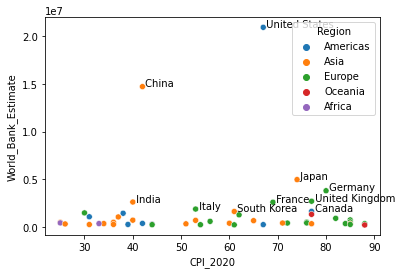

In [12]:
df_GDP['World_Bank_Estimate'] = df_GDP['World_Bank_Estimate'].astype('float')
df_draw = df_GDP#.nlargest(n=26, columns='World_Bank_Estimate')
sns.scatterplot(x=df_draw.CPI_2020.astype('float'), y=df_draw.World_Bank_Estimate.astype('float'), hue=df_draw.Region)
for i, row in df_draw.nlargest(n=10, columns='World_Bank_Estimate').iterrows():
    plt.text(float(row['CPI_2020']), float(row['World_Bank_Estimate']), row['Country'])

In [13]:
# plot